In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [168]:
r = np.random.multivariate_normal([0, 0], np.eye(2), 10000)
H, edges = np.histogramdd(r, bins = (10000, 10000), density=True)

In [169]:
max_index = np.unravel_index(np.argmax(H), H.shape)
print(max_index)
x1m = edges[0][0] + (edges[0][1] - edges[0][0])*(max_index[0]+0.5)
x2m = edges[1][0] + (edges[1][1] - edges[1][0])*(max_index[1]+0.5)
print(x1m, x2m)
pdf_max = np.exp(-x1m**2/2)*np.exp(-x2m**2/2)
print(pdf_max)
non_zero = np.where(H != 0)
non_zero = list(zip(non_zero[0], non_zero[1]))[1]
x1 = edges[0][0] + (edges[0][1] - edges[0][0])*(non_zero[0]+0.5)
x2 = edges[1][0] + (edges[1][1] - edges[1][0])*(non_zero[1]+0.5)
pdf_t = np.exp(-x1**2/2)*np.exp(-x2**2/2)
print(pdf_t)
dev = H[max_index]/H[non_zero]
dev_exp = pdf_max/pdf_t
print(dev)
print(dev_exp)

(5052, 3679)
0.23321073565911377 -0.8757937476768838
0.6631852156546136
0.00036930411181670134
2.0
1795.7699208715442


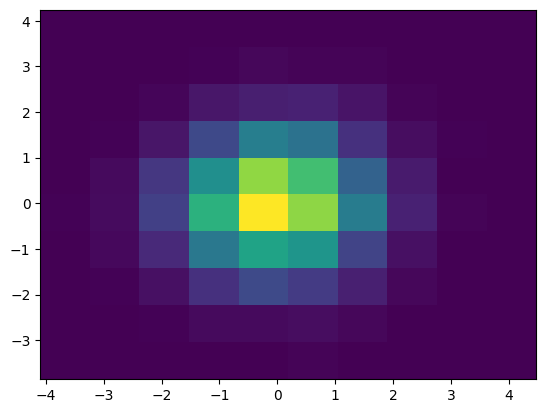

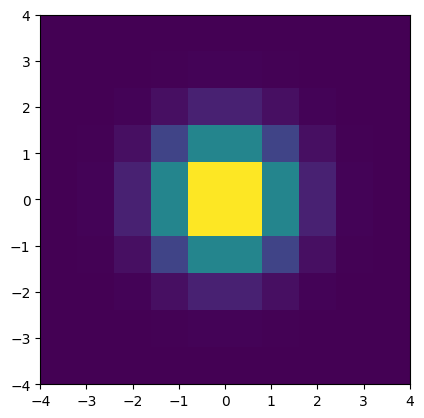

In [187]:
plt.figure()
plt.hist2d(r.T[0], r.T[1])
plt.figure()
x = np.linspace(-4, 4, 10)
y = np.linspace(-4, 4, 10)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X**2/2)*np.exp(-Y**2/2)
plt.imshow(Z, extent=(-4,4,-4,4))
plt.show()

In [1]:
from scipy.integrate import nquad
from ZAPS2 import*
# def f(x, y, z):
    

aaaaa
Accept_prob = 0.36923333333333336
-0.011054817128282775 0.0025303105801587795 -0.040163442137370615 -0.024932376861708464 0.02898636375430067 0.03594804760541534
-69.97995849193629
1.4497914395466842
5.784600819365657e+29


In [2]:
def f(x, y, z):
    return np.exp(-pot_energy(x, y, z)/T)


In [196]:
T = 50
result, error = nquad(f, [[-np.inf, np.inf], [-np.inf, np.inf], [-np.inf, np.inf]])
print(result, error)

C:\Python311\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


463529.010026243 13.647910514698125


In [206]:
result
c = 1/result
c_err = error/result**2
print(c, c_err)

2.1573622758657205e-06 6.352026874679081e-11


In [14]:
T = 10
k = 0.5
x = np.linspace(-k, k, 100)
y = np.linspace(-k, k, 100)
z = np.linspace(-k, k, 100)
X, Y, Z = np.meshgrid(x, y, z)
F = np.exp(-pot_energy(X, Y, Z)/T)
F = F/np.max(F)
print(len(F[0]))
# im = plt.imshow(F, extent=(-k, k, -k, k))
# cbar = plt.colorbar(im)

100


In [7]:
mh = metropolis_hastings(density, tuple(np.transpose(np.array((MaxBol(Delta(T)))))[0]), T, 1, 4, 500000)

Accept_prob = 0.36892156862745096


In [17]:
mh3 = mh[:3].T
a = np.linspace(-k, k, 101)
H, edges = np.histogramdd(mh3, bins = (a, a, a), density=True)
H = H/np.max(H)
print(len(H[0]))

100


In [26]:
dif = np.sum((H-F)**2)
print(dif)

4711.460652148801


In [24]:
max_index = np.unravel_index(np.argmax(H), H.shape)
print(max_index)
print(H[max_index], F[max_index])

(51, 47, 19)
1.0 0.6729967930121036


In [40]:
def tea(T, del_a):
    k = 0.5
    x = np.linspace(-k, k, 100)
    y = np.linspace(-k, k, 100)
    z = np.linspace(-k, k, 100)
    X, Y, Z = np.meshgrid(x, y, z)
    F = np.exp(-pot_energy(X, Y, Z)/T)
    F = F/np.max(F)
    mh = metropolis_hastings(density, tuple(np.transpose(np.array((MaxBol(Delta(T)))))[0]), T, del_a, 4, 500000);
    mh3 = mh[:3].T
    a = np.linspace(-k, k, 101)
    H, edges = np.histogramdd(mh3, bins = (a, a, a), density=True)
    H = H/np.max(H)
    dif = np.sum((H-F)**2)
    return dif

Accept_prob = 0.37300980392156863
136726.5194928841
Accept_prob = 0.3688470588235294
Accept_prob = 0.36875686274509806
Accept_prob = 0.3676274509803922
Accept_prob = 0.3683156862745098
Accept_prob = 0.36879411764705883
Accept_prob = 0.3724019607843137
Accept_prob = 0.3719862745098039
Accept_prob = 0.37401960784313726
Accept_prob = 0.3742
Accept_prob = 0.3736058823529412
Accept_prob = 0.37336274509803924


C:\Python311\Lib\site-packages\numpy\lib\histograms.py:1067: RuntimeWarning: invalid value encountered in divide
  hist /= s


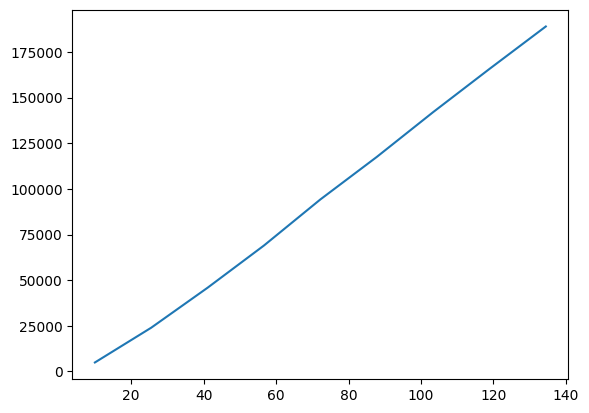

In [33]:
t = tea(100)
print(t)
t = np.linspace(10, 150, 10)
f = np.vectorize(tea)(t)
plt.plot(t, f);

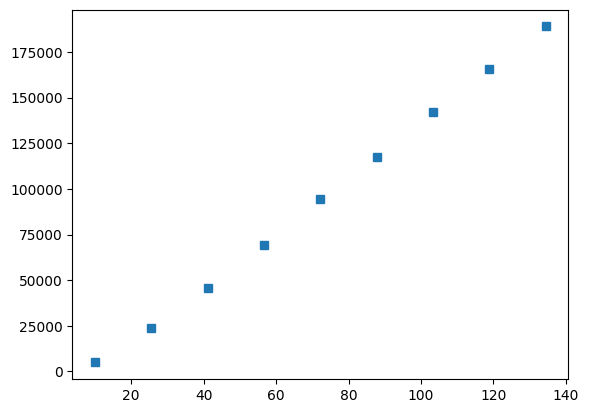

In [34]:
plt.plot(t, f, 's')

## При больших температурах мы получаем больший $\chi^2$

In [41]:
df = np.logspace(-3, 1, 10)
f = np.array([tea(20, i) for i in df])

Accept_prob = 0.9991058823529412
Accept_prob = 0.9981039215686275
Accept_prob = 0.9947921568627451
Accept_prob = 0.9816470588235294
Accept_prob = 0.950043137254902
Accept_prob = 0.8624549019607843
Accept_prob = 0.6446980392156862
Accept_prob = 0.27267843137254905
Accept_prob = 0.03768823529411765
Accept_prob = 0.00153921568627451


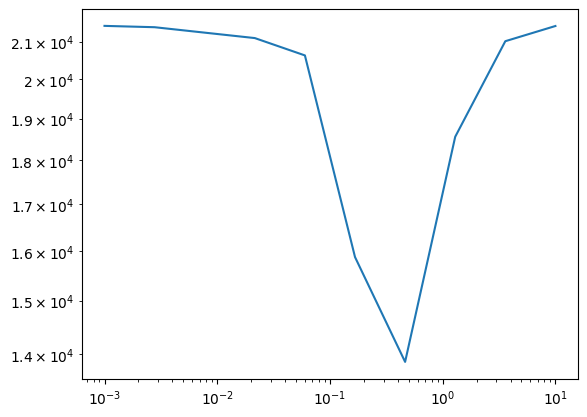

In [42]:
plt.loglog(df, f);

In [47]:
df = np.logspace(-3, 1, 100)
f = np.array([tea(20, i) for i in df])

Accept_prob = 0.999035294117647
Accept_prob = 0.9985352941176471
Accept_prob = 0.9990490196078431
Accept_prob = 0.9988607843137255
Accept_prob = 0.9986078431372549
Accept_prob = 0.9987529411764706
Accept_prob = 0.998721568627451
Accept_prob = 0.9985019607843137
Accept_prob = 0.9982901960784314
Accept_prob = 0.9974372549019608
Accept_prob = 0.997935294117647
Accept_prob = 0.997478431372549
Accept_prob = 0.9978294117647059
Accept_prob = 0.9975882352941177
Accept_prob = 0.9971725490196078
Accept_prob = 0.997278431372549
Accept_prob = 0.9956313725490196
Accept_prob = 0.9959176470588236
Accept_prob = 0.9953156862745098
Accept_prob = 0.9951588235294118
Accept_prob = 0.9949588235294118
Accept_prob = 0.9944450980392157
Accept_prob = 0.9931921568627451
Accept_prob = 0.9937372549019607
Accept_prob = 0.9917019607843137
Accept_prob = 0.9914862745098039
Accept_prob = 0.9911862745098039
Accept_prob = 0.9896960784313725
Accept_prob = 0.9892333333333333
Accept_prob = 0.9871627450980393
Accept_prob = 0

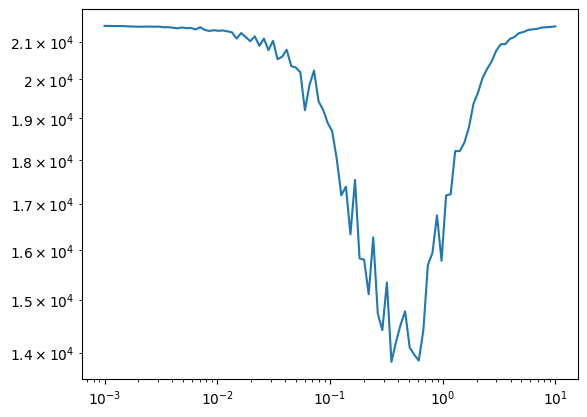

In [48]:
plt.loglog(df, f);

In [49]:
df = np.logspace(-3, 1, 40)
f = np.array([tea(50, i) for i in df])

Accept_prob = 0.9995039215686274
Accept_prob = 0.9991862745098039
Accept_prob = 0.9987411764705882
Accept_prob = 0.9984666666666666
Accept_prob = 0.998343137254902
Accept_prob = 0.9975156862745098
Accept_prob = 0.996643137254902
Accept_prob = 0.9952274509803921
Accept_prob = 0.9944078431372549
Accept_prob = 0.9930254901960784
Accept_prob = 0.9913509803921569
Accept_prob = 0.9894352941176471
Accept_prob = 0.985943137254902
Accept_prob = 0.9824647058823529
Accept_prob = 0.9774705882352941
Accept_prob = 0.9712392156862745
Accept_prob = 0.9635882352941176
Accept_prob = 0.9530470588235294
Accept_prob = 0.942421568627451
Accept_prob = 0.9274137254901961
Accept_prob = 0.906178431372549
Accept_prob = 0.8826254901960784
Accept_prob = 0.8521960784313726
Accept_prob = 0.8153549019607843
Accept_prob = 0.7676058823529411
Accept_prob = 0.7119372549019608
Accept_prob = 0.6444352941176471
Accept_prob = 0.5670666666666667
Accept_prob = 0.481578431372549
Accept_prob = 0.3914
Accept_prob = 0.302433333333

0.28942661247167517


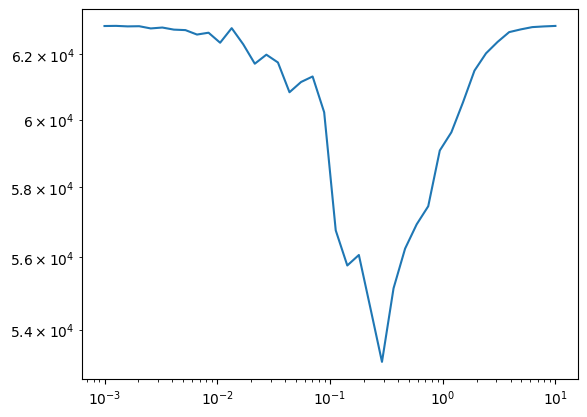

In [52]:
plt.loglog(df, f);
print(df[np.argmin(f)])

In [53]:
df = np.logspace(-3, 1, 40)
f = np.array([tea(80, i) for i in df])

Accept_prob = 0.9993529411764706
Accept_prob = 0.9991588235294118
Accept_prob = 0.9987823529411765
Accept_prob = 0.9984509803921569
Accept_prob = 0.9982549019607844
Accept_prob = 0.9967450980392157
Accept_prob = 0.9960764705882353
Accept_prob = 0.9964098039215686
Accept_prob = 0.9952078431372549
Accept_prob = 0.9922313725490196
Accept_prob = 0.9912686274509804
Accept_prob = 0.9885058823529411
Accept_prob = 0.9856784313725491
Accept_prob = 0.9818411764705882
Accept_prob = 0.9776039215686274
Accept_prob = 0.9713411764705883
Accept_prob = 0.9628568627450981
Accept_prob = 0.9539098039215687
Accept_prob = 0.9409450980392157
Accept_prob = 0.9263960784313725
Accept_prob = 0.9071843137254902
Accept_prob = 0.8830313725490196
Accept_prob = 0.8524627450980392
Accept_prob = 0.8151470588235294
Accept_prob = 0.7685549019607844
Accept_prob = 0.7123843137254902
Accept_prob = 0.6450411764705882
Accept_prob = 0.5706411764705882
Accept_prob = 0.4847137254901961
Accept_prob = 0.39314313725490196
Accept_pr

0.46415888336127775


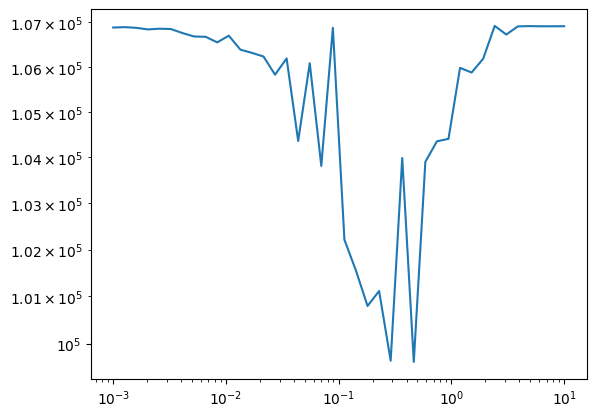

In [54]:
plt.loglog(df, f);
print(df[np.argmin(f)])

## Вообще для нашего потенциала Wolfram показывает, что распредление Больцмана не может быть отнормировано, трехмерный интеграл расходится. Поэтому, может, имеет смысл задуматься о применимости распределения Больцмана

In [1]:
from ZAPS2 import *
from tqdm import tqdm

wwww
Accept_prob = 0.34117254901960786
0.003912524576338191 -0.0102052201951291 0.08181905130512147 0.0329784461798768 0.12077728629210056 -0.09986921380398124
-6.996476051292367
1.350175267149491
282.24175307955426


In [2]:
def tea(T, del_a):
    k = 0.5
    x = np.linspace(-k, k, 100)
    y = np.linspace(-k, k, 100)
    z = np.linspace(-k, k, 100)
    X, Y, Z = np.meshgrid(x, y, z)
    F = np.exp(-pot_energy(X, Y, Z)/T)
    F = F/np.max(F)
    mh = metropolis_hastings(density, tuple(np.transpose(np.array((MaxBol(Delta(T)))))[0]), T, del_a, 4, 500000);
    mh3 = mh[:3].T
    a = np.linspace(-k, k, 101)
    H, edges = np.histogramdd(mh3, bins = (a, a, a), density=True)
    H = H/np.max(H)
    dif = np.sum((H-F)**2)
    return dif

In [3]:
df = np.logspace(-3, 1, 40)
f = np.array([tea(100, i) for i in df])

Accept_prob = 0.999456862745098
Accept_prob = 0.9981313725490196
Accept_prob = 0.9992450980392157
Accept_prob = 0.9981137254901961
Accept_prob = 0.9980823529411764
Accept_prob = 0.9974117647058823
Accept_prob = 0.997143137254902
Accept_prob = 0.9953294117647059
Accept_prob = 0.9946803921568628
Accept_prob = 0.993
Accept_prob = 0.9909019607843137
Accept_prob = 0.988756862745098
Accept_prob = 0.9853862745098039
Accept_prob = 0.981735294117647
Accept_prob = 0.9769941176470588
Accept_prob = 0.9703254901960784
Accept_prob = 0.9613666666666667
Accept_prob = 0.9516803921568627
Accept_prob = 0.9383980392156863
Accept_prob = 0.9227058823529412
Accept_prob = 0.9034882352941176
Accept_prob = 0.8766490196078431
Accept_prob = 0.8438392156862745
Accept_prob = 0.8036078431372549
Accept_prob = 0.7534470588235294
Accept_prob = 0.6857156862745099
Accept_prob = 0.6184627450980392
Accept_prob = 0.5425686274509804
Accept_prob = 0.4548274509803922
Accept_prob = 0.3677627450980392
Accept_prob = 0.27480392156

0.18047217668271703


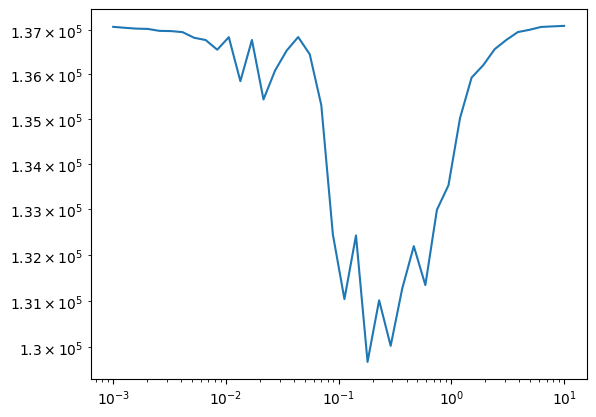

In [4]:
plt.loglog(df, f);
print(df[np.argmin(f)])